# Spectral Clustering from Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

### Generating the Datset for clustering

In [2]:
X,y = make_moons(250,random_state=19,noise=0.01)

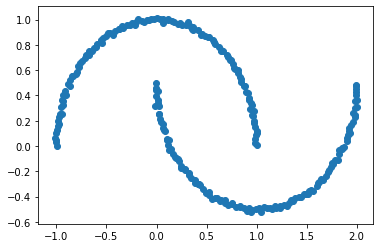

In [3]:
plt.scatter(X[:,0],X[:,1])

### Set the parameters here

In [4]:
sigma_sq = 0.04 #scaling parameter
k = 2 #Number of cluster

In [5]:
def create_affinity_matrix():
    '''Function to create afiinity matrix'''
    affinity_matrix = np.zeros((X.shape[0],X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if i!=j:
                affinity_matrix[i,j] = np.exp(-sum((X[i]-X[j])**2)/(2*sigma_sq))
    return affinity_matrix

In [6]:
def create_diagonal_matrix_inv():
    '''Function to create inverse diagonal matrix **(-0.5) '''
    diagonal_matrix_inv = np.zeros((X.shape[0],X.shape[0]))
    for i in range(X.shape[0]):
        diagonal_matrix_inv[i,i] = sum(A[i,:])**-0.5
    return diagonal_matrix_inv

### Extracting the transformed dataset

In [7]:
A = create_affinity_matrix()
D_inv = create_diagonal_matrix_inv()
L = (D_inv.dot(A)).dot(D_inv)
eigenval,eigenvec = np.linalg.eig(L)
M = eigenvec[:,:k] #Extracting the k largest vectors from L
Y = np.array([M[i]/(np.sqrt(sum(M[i]**2))) for i in range(M.shape[0])]) #Final transformed dataset

### Importing the KMeans Algorithm package

In [8]:
from sklearn.cluster import KMeans

### Using KMeans in tranformed data to find clusters

In [9]:
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(Y)

### Result of Spactral clustering

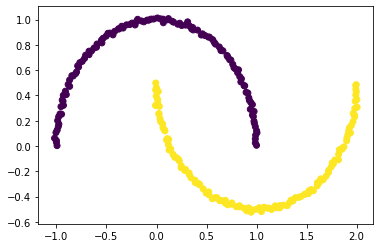

In [10]:
plt.scatter(X[:,0],X[:,1],c=clusters)

### Now Look at the result of using KMeans directly in the datset

In [11]:
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)

### Result of KMeans Algorithm

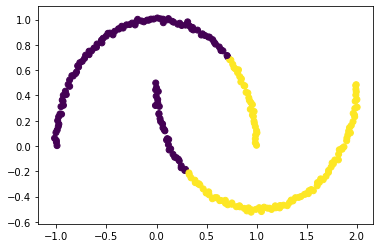

In [12]:
plt.scatter(X[:,0],X[:,1],c=clusters)